In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Extracurricular Activities']=le.fit_transform(df['Extracurricular Activities'])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [19]:
X=df['Previous Scores']
y=df['Performance Index']

In [22]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

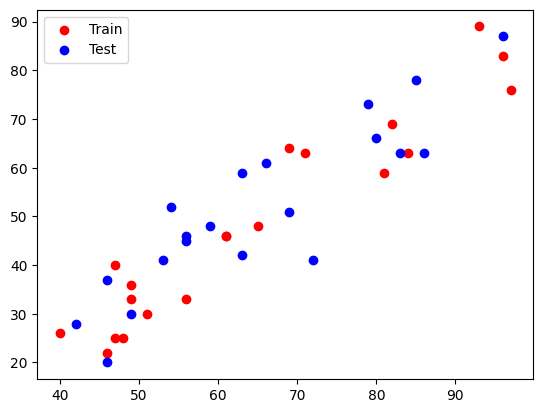

In [26]:
plt.scatter(X_train[0:20], y_train[0:20], c='red', label='Train')
plt.scatter(X_test[0:20], y_test[0:20], c='blue', label='Test')
plt.legend()
plt.show()

###WITHOUT DROP OUT MODEL

In [30]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500,
                    validation_data = (X_test, y_test),
                    verbose=True)

Epoch 1/500
250/250 [==============================] - 1s 3ms/step - loss: 109.2325 - mse: 109.2325 - val_loss: 67.4683 - val_mse: 67.4683
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 69.3629 - mse: 69.3629 - val_loss: 64.8449 - val_mse: 64.8449
Epoch 3/500
250/250 [==============================] - 1s 2ms/step - loss: 68.7598 - mse: 68.7598 - val_loss: 59.7702 - val_mse: 59.7702
Epoch 4/500
250/250 [==============================] - 1s 2ms/step - loss: 64.3846 - mse: 64.3846 - val_loss: 62.5517 - val_mse: 62.5517
Epoch 5/500
250/250 [==============================] - 1s 2ms/step - loss: 67.7029 - mse: 67.7029 - val_loss: 60.8579 - val_mse: 60.8579
Epoch 6/500
250/250 [==============================] - 1s 2ms/step - loss: 68.5123 - mse: 68.5123 - val_loss: 74.0284 - val_mse: 74.0284
Epoch 7/500
250/250 [==============================] - 1s 2ms/step - loss: 65.0530 - mse: 65.0530 - val_loss: 76.9517 - val_mse: 76.9517
Epoch 8/500
250/250 [==================

In [31]:
y_pred_1 = model_1.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [34]:
y_pred_1[0:5]

array([[56.237343],
       [32.422115],
       [42.77656 ],
       [28.280338],
       [39.670227]], dtype=float32)

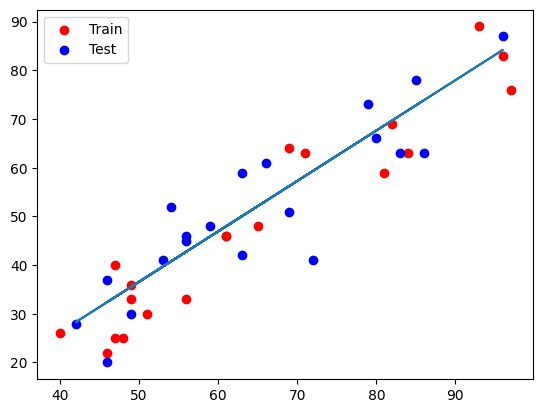

In [36]:
plt.scatter(X_train[0:20], y_train[0:20], c='red', label='Train')
plt.scatter(X_test[0:20], y_test[0:20], c='blue', label='Test')
plt.plot(X_test[0:20], y_pred_1[0:20])
plt.legend()
plt.show()

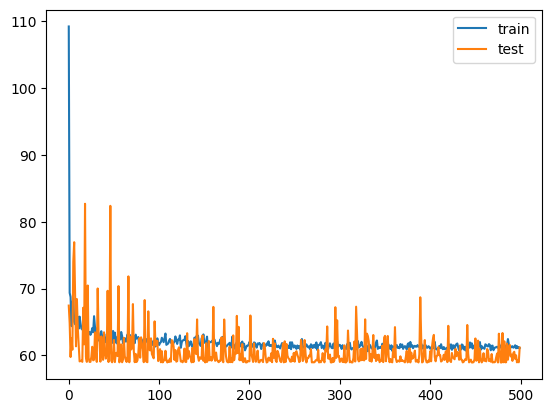

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

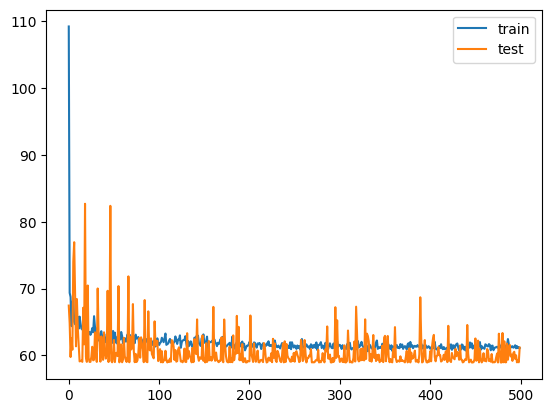

In [38]:
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

###DROPOUT MODEL

In [39]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500,
                               validation_data = (X_test, y_test),
                               verbose=True)

Epoch 1/500
250/250 [==============================] - 2s 3ms/step - loss: 156.0170 - mse: 156.0170 - val_loss: 68.2185 - val_mse: 68.2185
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 118.4054 - mse: 118.4054 - val_loss: 80.3636 - val_mse: 80.3636
Epoch 3/500
250/250 [==============================] - 1s 3ms/step - loss: 114.6213 - mse: 114.6213 - val_loss: 64.7038 - val_mse: 64.7038
Epoch 4/500
250/250 [==============================] - 1s 3ms/step - loss: 114.7747 - mse: 114.7747 - val_loss: 61.1427 - val_mse: 61.1427
Epoch 5/500
250/250 [==============================] - 1s 5ms/step - loss: 118.3669 - mse: 118.3669 - val_loss: 64.2452 - val_mse: 64.2452
Epoch 6/500
250/250 [==============================] - 1s 5ms/step - loss: 110.2203 - mse: 110.2203 - val_loss: 60.1448 - val_mse: 60.1448
Epoch 7/500
250/250 [==============================] - 1s 5ms/step - loss: 109.6236 - mse: 109.6236 - val_loss: 85.5406 - val_mse: 85.5406
Epoch 8/500
250/250 [======

In [40]:
y_pred_2 = model_2.predict(X_test)

63/63 [==============================] - 0s 2ms/step


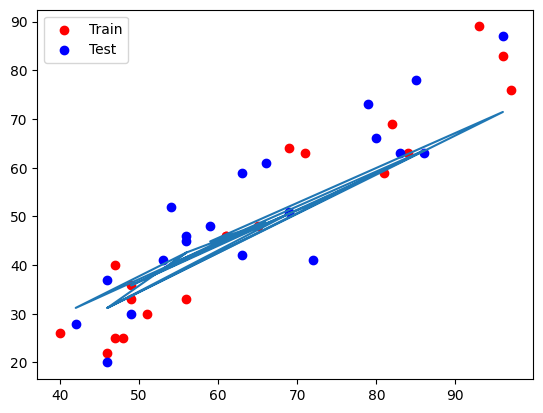

In [41]:
plt.scatter(X_train[0:20], y_train[0:20], c='red', label='Train')
plt.scatter(X_test[0:20], y_test[0:20], c='blue', label='Test')
plt.plot(X_test[0:20], y_pred_2[0:20])
plt.legend()
plt.show()

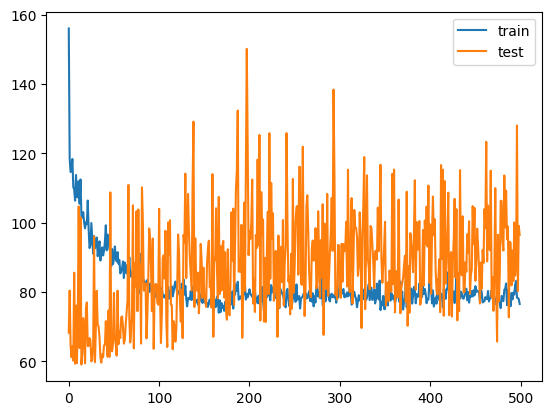

In [42]:
plt.plot(drop_out_history.history['loss'], label='train')
plt.plot(drop_out_history.history['val_loss'], label='test')
plt.legend()
plt.show()

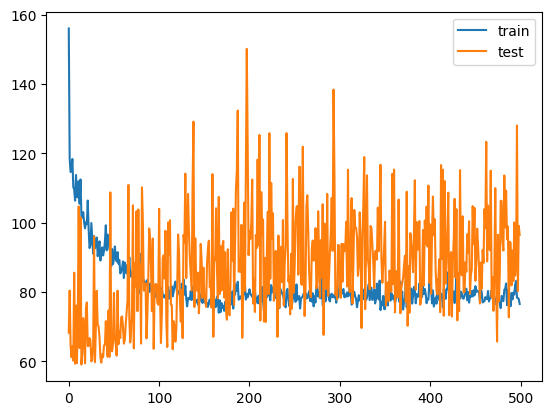

In [43]:
plt.plot(drop_out_history.history['mse'], label='train')
plt.plot(drop_out_history.history['val_mse'], label='test')
plt.legend()
plt.show()

## using PCA

In [44]:
X1=df.drop('Performance Index', axis=1)
y=df['Performance Index']

In [45]:
X1.shape

(10000, 5)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X1)

In [49]:
# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)  # Reduce to 1 dimensions
X_pca = pca.fit_transform(X_scaled)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

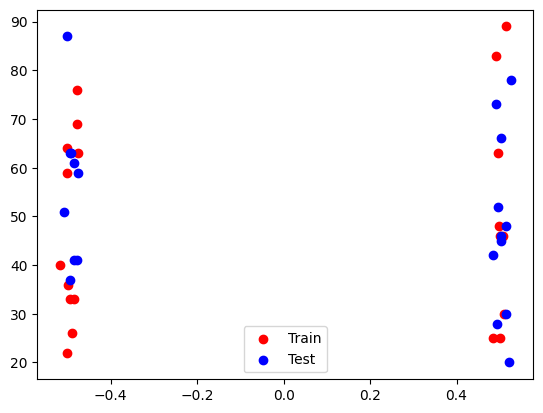

In [51]:
plt.scatter(X_train[0:20], y_train[0:20], c='red', label='Train')
plt.scatter(X_test[0:20], y_test[0:20], c='blue', label='Test')
plt.legend()
plt.show()

In [58]:
from tensorflow.keras.callbacks import EarlyStopping
model_3 = Sequential()
model_3.add(Dense(128, input_dim=1, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(128, activation="relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_3.compile(loss='mse', optimizer=adam, metrics=['mse'])
early_stopping = EarlyStopping(
    monitor='val_mse',  # Monitor the validation loss
    patience=3,          # Number of epochs with no improvement before stopping
    min_delta=0.001,     # Minimum change to qualify as an improvement
    mode='min',          # Stop when the monitored quantity has stopped decreasing
    restore_best_weights=True,  # Restore the weights from the best epoch
    verbose=1            # Verbosity mode
)
drop_out_history_PCA = model_3.fit(X_train, y_train, epochs=500,
                               validation_data = (X_test, y_test),
                               verbose=True,callbacks=[early_stopping])

Epoch 1/500
250/250 [==============================] - 2s 4ms/step - loss: 588.6278 - mse: 588.6278 - val_loss: 394.9210 - val_mse: 394.9210
Epoch 2/500
250/250 [==============================] - 1s 3ms/step - loss: 460.4594 - mse: 460.4594 - val_loss: 371.4691 - val_mse: 371.4691
Epoch 3/500
250/250 [==============================] - 1s 3ms/step - loss: 454.0526 - mse: 454.0526 - val_loss: 376.9854 - val_mse: 376.9854
Epoch 4/500
250/250 [==============================] - 1s 3ms/step - loss: 449.3451 - mse: 449.3451 - val_loss: 377.9557 - val_mse: 377.9557
Epoch 5/500
250/250 [==============================] - 1s 3ms/step - loss: 441.2665 - mse: 441.2665 - val_loss: 370.0606 - val_mse: 370.0606
Epoch 6/500
250/250 [==============================] - 1s 3ms/step - loss: 428.3128 - mse: 428.3128 - val_loss: 375.0602 - val_mse: 375.0602
Epoch 7/500
250/250 [==============================] - 1s 3ms/step - loss: 419.2451 - mse: 419.2451 - val_loss: 371.8895 - val_mse: 371.8895
Epoch 8/500
2

In [59]:
y_pred_3 = model_3.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [60]:
y_pred_3[0:5]

array([[54.26256 ],
       [55.467075],
       [55.4206  ],
       [55.39976 ],
       [54.273   ]], dtype=float32)

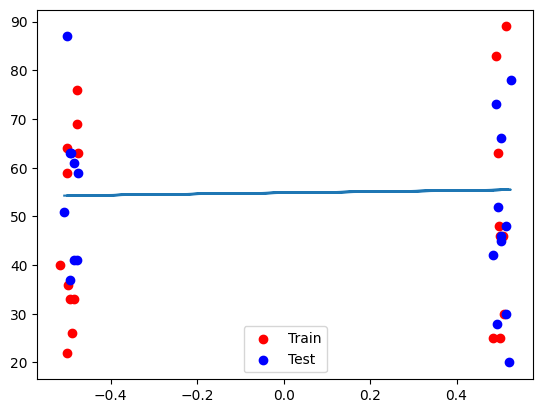

In [61]:
plt.scatter(X_train[0:20], y_train[0:20], c='red', label='Train')
plt.scatter(X_test[0:20], y_test[0:20], c='blue', label='Test')
plt.plot(X_test[0:20], y_pred_3[0:20])
plt.legend()
plt.show()

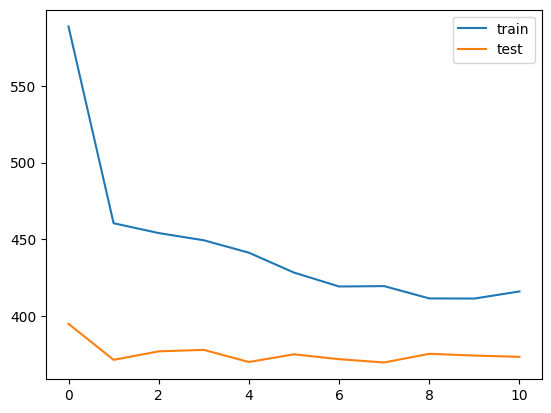

In [62]:
plt.plot(drop_out_history_PCA.history['loss'], label='train')
plt.plot(drop_out_history_PCA.history['val_loss'], label='test')
plt.legend()
plt.show()

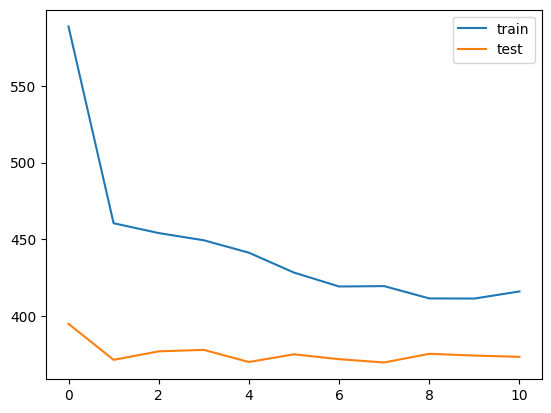

In [63]:
plt.plot(drop_out_history_PCA.history['mse'], label='train')
plt.plot(drop_out_history_PCA.history['val_mse'], label='test')
plt.legend()
plt.show()